In [3]:
import numpy as np
from skimage import io, color, exposure, img_as_float
import matplotlib.pyplot as plt

# Problem 1

In [5]:
# import the "good.jpeg" image
I = io.imread('good.jpeg')

# normalize the image
I_norm = img_as_float(I)

# convert the RGB image to grayscale
I_gray = color.rgb2gray(I_norm)

# perform arithmetic operations (contrast increase/decrease) on the grayscale image
I_add = np.clip(I_gray + 0.5,0,1)  # increase by 0.5
I_sub = np.clip(I_gray -0.4,0,1)  # decrease by 0.4
I_mul = np.clip(I_gray * 2,0,1) # multiply by 2
I_div =  np.clip(I_gray / 3,0,1) # divide by 3

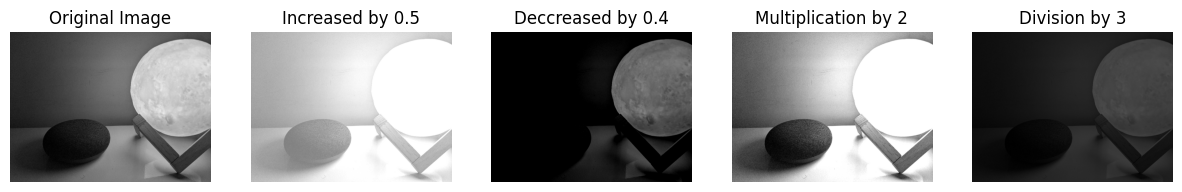

In [6]:
plt.figure(figsize=(15,15))
plt.subplot(1, 5, 1)
plt.imshow(I_gray, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(I_add, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Increased by 0.5')

plt.subplot(1,5, 3)
plt.imshow(I_sub, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Deccreased by 0.4')

plt.subplot(1, 5, 4)
plt.imshow(I_mul, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Multiplication by 2')

plt.subplot(1, 5, 5)
plt.imshow(I_div, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Division by 3');

# Problem 2

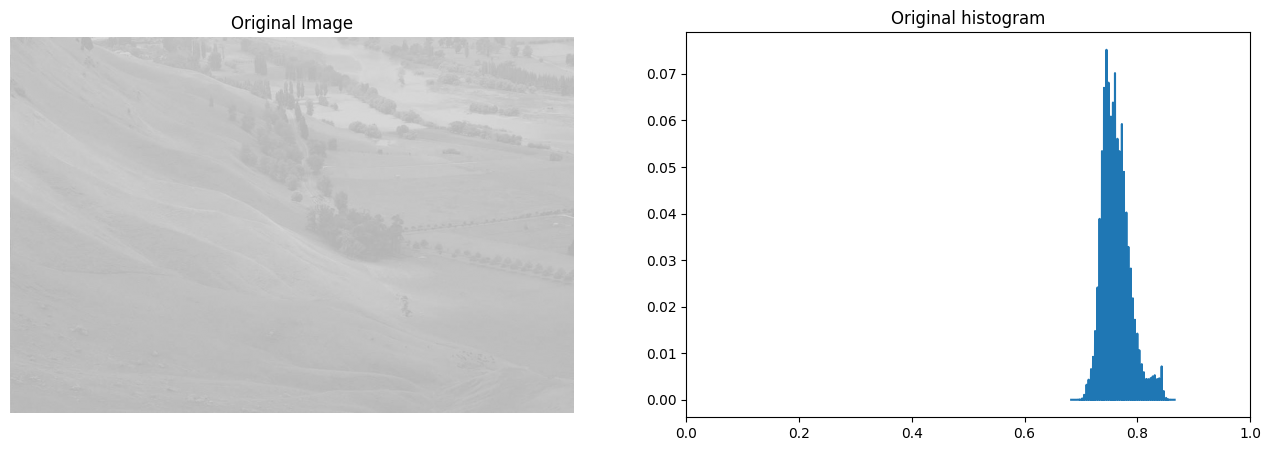

In [14]:
# import the "land.jpeg" image
I = io.imread('land.jpeg')

# normalize the image
I_norm = img_as_float(I)

# calculate the PDF of the original image
hist_org, nbins_org = exposure.histogram(I_norm, nbins=256, normalize= True)


plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.imshow(I_norm, vmin = 0, vmax = 1, cmap = 'gray')
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(nbins_org,hist_org)
plt.title('Original histogram')
plt.xlim(0, 1);

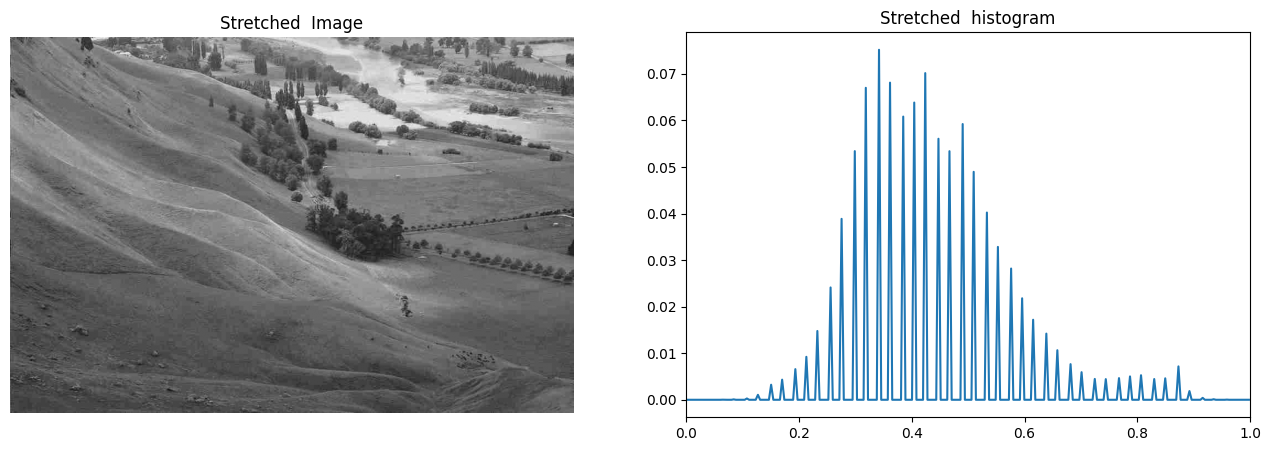

In [19]:
# contrast stretch the image, I_norm, to improve the image quality
# you can get c_min and c_max using I.min() and I.max() as it has been clipped accordingly
c_min= I_norm.min()
c_max= I_norm.max()

#I_stretched = (I_norm - I_norm.min()) / (I_norm.max() - I_norm.min())
#I_stretched = exposure.rescale_intensity (I_norm, in_range=(c_min, c_max), out_range=(0.0,1.0))


I_stretched = (I_norm - c_min) / (c_max - c_min)

# calculate the PDF of the stretched image
hist_str, nbins_str =  exposure.histogram(I_stretched , nbins=256, normalize= True)


plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.imshow(I_stretched, vmin = 0, vmax = 1, cmap = 'gray')
plt.axis("off")
plt.title('Stretched  Image')


plt.subplot(1, 2, 2)
plt.plot(nbins_str,hist_str)
plt.title('Stretched  histogram')
plt.xlim(0, 1);